# Prog6280a - Jobs in data Science

In [2]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
#read dataset into dataframe
df = pd.read_csv('/workspaces/AP-ComputerScience/data/jobs_in_data_science.csv')
df.columns = df.columns.str.strip() #get rid of trailing spaces in column names
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


## Task 1: Salary Trends over time

<function matplotlib.pyplot.show(close=None, block=None)>

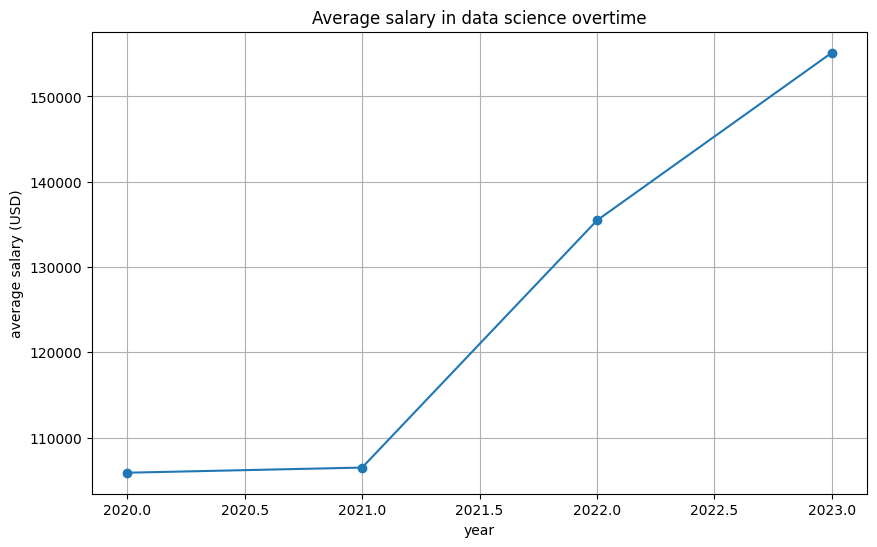

In [6]:
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10,6)) # 10in x 6in
avg_salary_by_year.plot(kind='line',marker='o')
plt.title('Average salary in data science overtime')
plt.xlabel('year')
plt.ylabel('average salary (USD)')
plt.grid(True)
plt.show

TEh average salary in data science has shown an upward trend over the years, indicating, a growing value in the field

## Task 2: Salary Distribution by Job Title

<Figure size 1200x800 with 0 Axes>

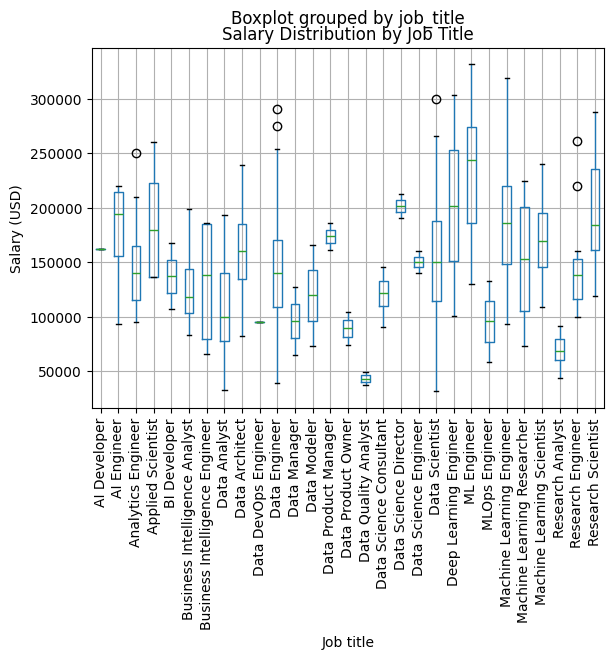

In [9]:
plt.figure(figsize=(12, 8))
df.head(500).boxplot(column='salary_in_usd', by='job_title')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=90)
plt.show()

There is a wide variation in salaries across different job titles, with mostly, AI-Related, roles havingt drastically higher median salaries and wider ranges.

## Task 3: Experience Level vs. Salary.

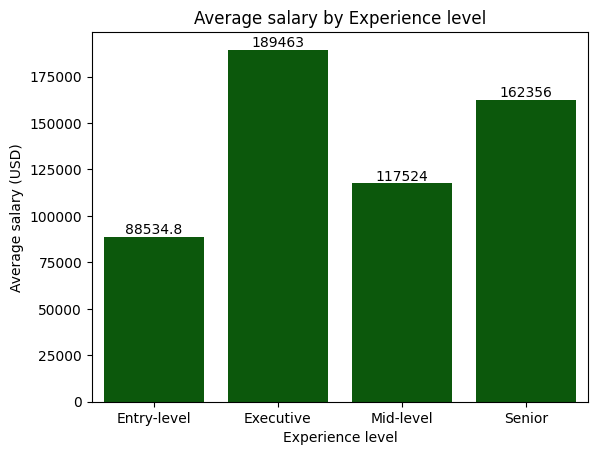

In [15]:
salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean()
#salary_by_exp.plot(kind='bar')
ax = sns.barplot(x=salary_by_exp.index, y=salary_by_exp.values,color='darkgreen')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average salary by Experience level')
plt.xlabel('Experience level')
plt.ylabel('Average salary (USD)')
plt.show()

## Task 4: Geographic Salary distribution.

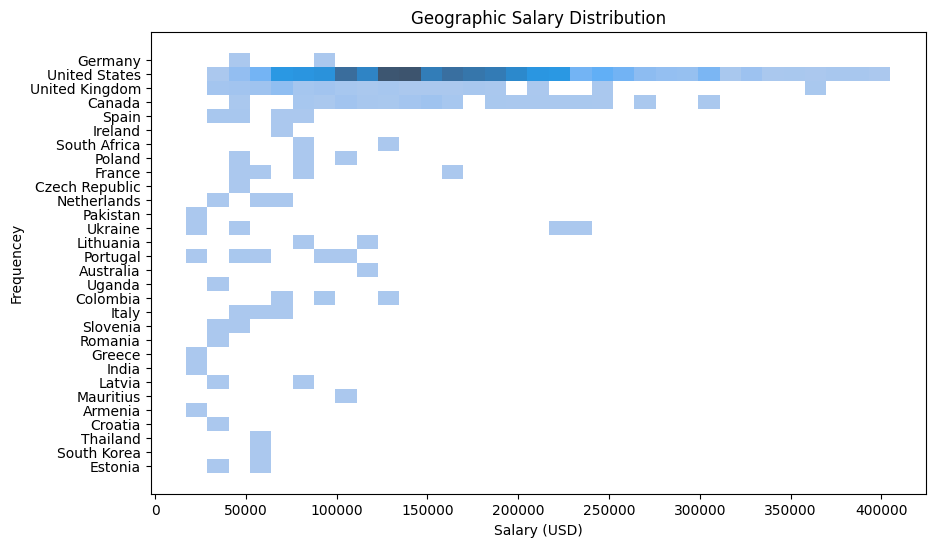

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(y='employee_residence', x='salary_in_usd', data=df.head(2500))
plt.title('Geographic Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequencey')
plt.show()

#### Salaries in data science vary significantyl across countris with some (like the U.S.) showing a higher concentration of higher salaries.

## Task 5: Company Size and salary Structure.

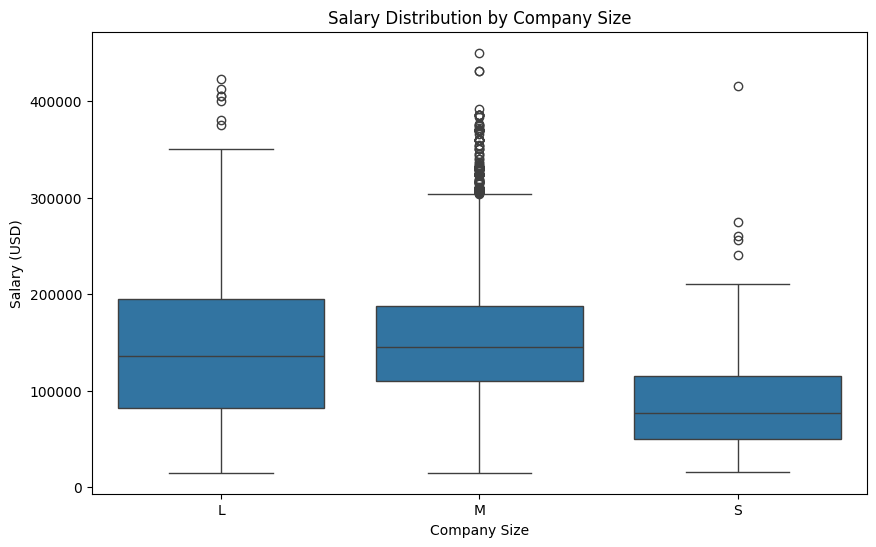

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='company_size', y='salary_in_usd',data=df) #sns.violinplot(...)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

Salaries differ across company sizes, with larger companies most likely offering a wider salary range.

## Task 6: Impact of Work Setting on Salary

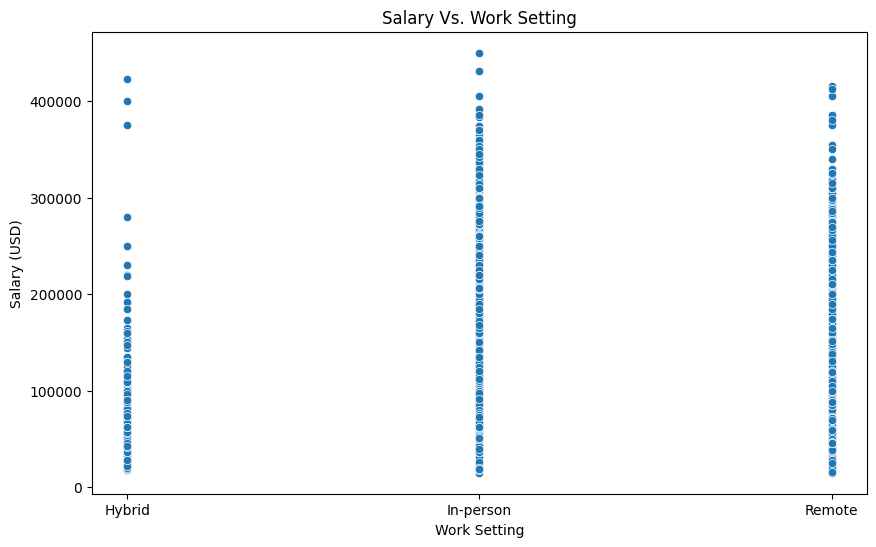

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='work_setting', y='salary_in_usd',data = df)
plt.title('Salary Vs. Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary (USD)')
plt.show()

There doesn't seem to be a clear patter linking work setting to salary, indicationg, other factor may play a more significant role, in salary placement.